In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

import joblib


In [2]:
#Loading the datasets 
df = pd.read_csv(r"C:\Users\vivek\Downloads\Fuel_efficiency\fuel_efficiency_dataset.csv")
# Visualising the data set 
df.head()

,Engine_Size_L,Cylinders,Compression_Ratio,Horsepower,Torque_Nm,RPM,Load_Percent,Ambient_Temp_C,Fuel_Type,Fuel_Type_Encoded,Fuel_Efficiency_kmpl
0,2.87,6,10.60,343.1,214.6,4472,49.1,11.9,Petrol,0,7.81
1,5.75,8,10.40,322.3,421.1,1027,95.1,5.4,Petrol,0,2.23
2,4.66,4,8.13,259.3,498.9,2985,42.0,5.8,Petrol,0,6.19
3,3.99,8,9.71,385.5,112.0,6656,46.6,27.9,Diesel,1,4.17
4,1.78,8,9.90,136.2,458.9,5153,76.1,25.7,Diesel,1,5.54


In [3]:
print(f"Shape:", {df.shape})
print(df.info())
print(df.describe())
print('\nMissing Values: \n', df.isnull().sum())

Shape: {(1300, 11)}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine_Size_L         1300 non-null   float64
 1   Cylinders             1300 non-null   int64  
 2   Compression_Ratio     1300 non-null   float64
 3   Horsepower            1300 non-null   float64
 4   Torque_Nm             1300 non-null   float64
 5   RPM                   1300 non-null   int64  
 6   Load_Percent          1300 non-null   float64
 7   Ambient_Temp_C        1300 non-null   float64
 8   Fuel_Type             1300 non-null   object 
 9   Fuel_Type_Encoded     1300 non-null   int64  
 10  Fuel_Efficiency_kmpl  1300 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 111.8+ KB
None
       Engine_Size_L    Cylinders  Compression_Ratio   Horsepower  \
count    1300.000000  1300.000000        1300.000000  1300.000000   
mea

 ***Note** : No Missing Values in datasets hence we can move further 

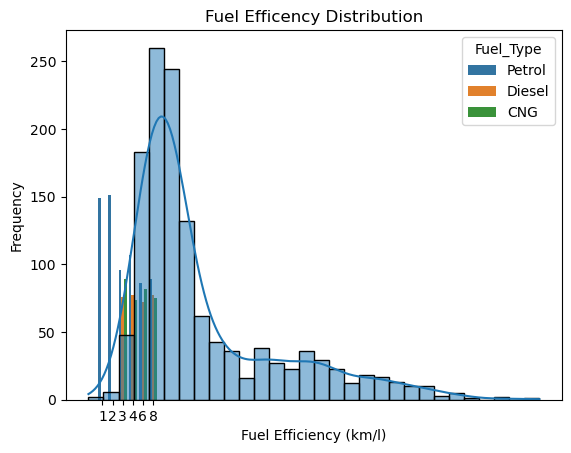

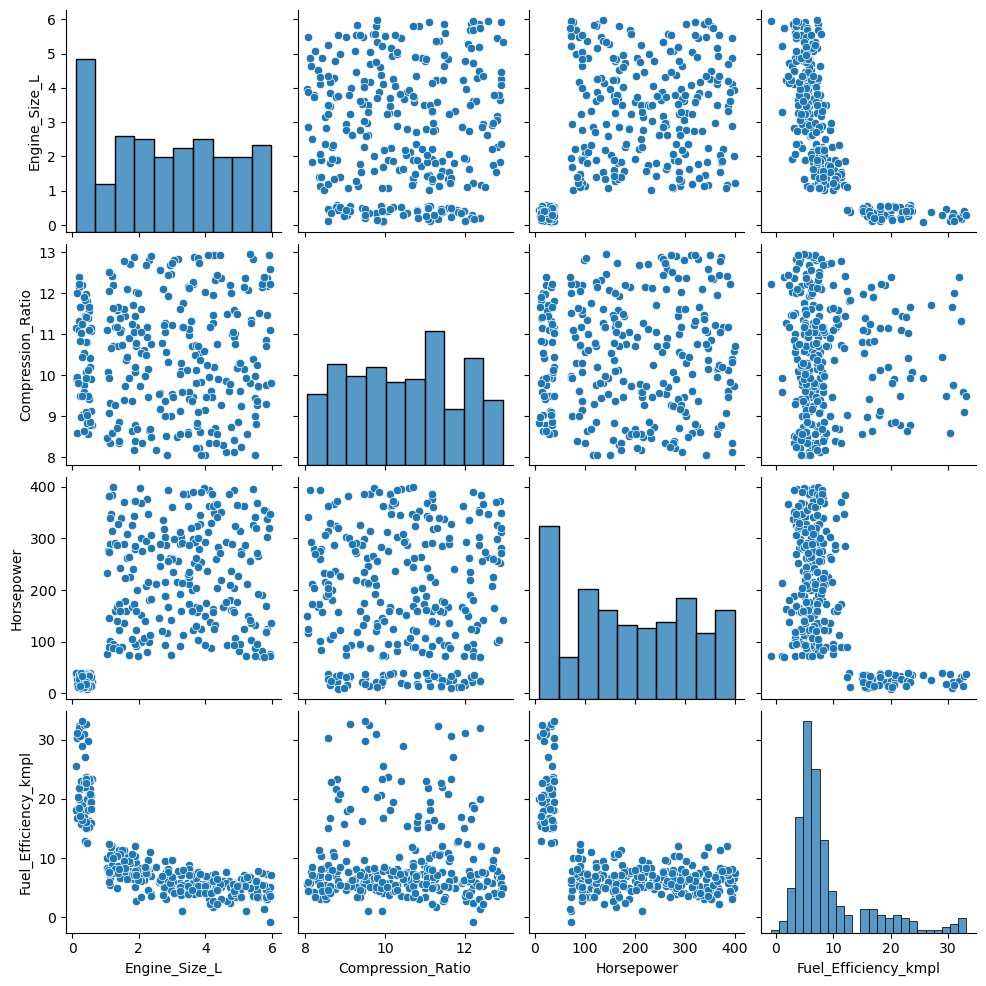

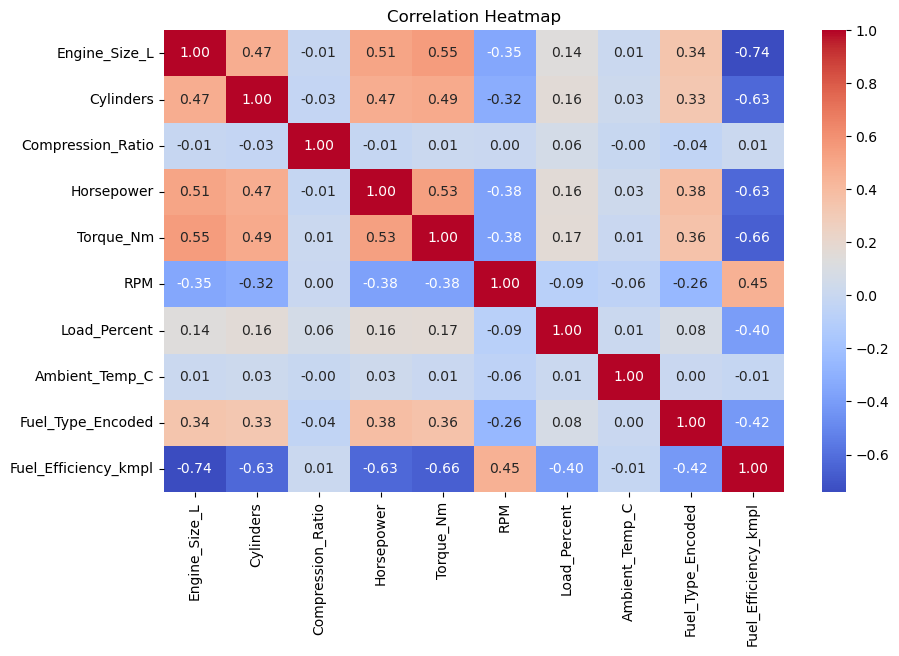

In [4]:
# for better visualisation we will use graphs, heatmaps, countplots
sns.countplot(data = df, x = "Cylinders", hue = "Fuel_Type")
plt.title("Distribution of Cylinders by fuel type")
plt.show 

sns.histplot(df["Fuel_Efficiency_kmpl"], bins =30, kde= True)
plt.title("Fuel Efficency Distribution")
plt.ylabel("Frequency")
plt.xlabel("Fuel Efficiency (km/l)")
plt.show()

sample_df = df.sample(300, random_state= 42)
sns.pairplot(sample_df[["Engine_Size_L", "Compression_Ratio", "Horsepower", "Fuel_Efficiency_kmpl"]])
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap= "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()
             

In [6]:
# preprocessing
features= ["Engine_Size_L",	"Cylinders",	"Compression_Ratio",	"Horsepower",	"Torque_Nm",	"RPM",	"Load_Percent",	"Ambient_Temp_C",	"Fuel_Type",	"Fuel_Type_Encoded"]
X = df.drop(columns=['Fuel_Efficiency_kmpl'])   # Replace with your actual target column
y = df['Fuel_Efficiency_kmpl']

In [7]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [8]:
#Train_Test_split 
X_train,X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


In [9]:
#Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [20]:
# DNN Model :)
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Explicitly specifying linear activation
])

dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
dnn_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100


c:\Users\vivek\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 129.7118 - mae: 8.7950 - val_loss: 93.1001 - val_mae: 7.0861
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.5483 - mae: 6.0795 - val_loss: 35.8302 - val_mae: 4.0539
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.7112 - mae: 3.0442 - val_loss: 12.2117 - val_mae: 2.5374
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7985 - mae: 2.2955 - val_loss: 9.3929 - val_mae: 2.2354
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1041 - mae: 2.0188 - val_loss: 8.1395 - val_mae: 2.0870
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3516 - mae: 1.9075 - val_loss: 7.2652 - val_mae: 1.9987
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5536 - mae: 1.8600 - val_loss: 6.8054 - val_mae: 1.9329
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6186 - mae: 1.7626 - val_loss: 6.4870 - val_mae: 1.8965
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5150 - m

In [21]:
# Random Forest Model :)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Evaluation
rf_preds = rf_model.predict(X_test_scaled)
dnn_preds = dnn_model.predict(X_test_scaled).flatten()

print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2 Score:", r2_score(y_test, rf_preds))

print("\nDNN Model Performance:")
print("MSE:", mean_squared_error(y_test, dnn_preds))
print("R2 Score:", r2_score(y_test, dnn_preds))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Random Forest Performance:
MSE: 3.5616655971153817
R2 Score: 0.927421038684342

DNN Model Performance:
MSE: 4.40318421757679
R2 Score: 0.9102727282280374


In [23]:
# Saving the in diff file 
joblib.dump(rf_model, "random_forest_modell.pkl")
joblib.dump(scaler, "scaler.pkl")
dnn_model.save("dnn_model.h5")